<a href="https://colab.research.google.com/github/athanaseH12/PCA-Cluster-analysis-Timeseries-and-Wavelet-analysis-in-Python/blob/main/NetCDF_to_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from scipy import signal
import seaborn as sns
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#import cartopy.feature as cfeature
# from mpl_toolkits.basemap import Basemap, maskoceans



In [3]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.0 MB/s eta 0:00:00


In [7]:
data0 ="/content/chirps_1931_1960_remapbil_Dar_es_salam.nc"
ncin0 = Dataset(data0)
SAT0  = ncin0.variables['precip'][:,:,:] 
lat  = ncin0.variables['lat'][:]
time =ncin0.variables['time'][:]
lon  = ncin0.variables['lon'][:]
ncin0.close()
nt,nlat,nlon = SAT0.shape

In [8]:
precipitation=SAT0.flatten()
print(precipitation)

[-0.68455213  0.88242733 -1.3710682  -0.78162783  0.61721677 -0.10737093
 -0.55470085 -0.130625   -0.2878127   1.7999005   1.2620859  -0.20170958
  1.7812963  -0.1377161   0.05414099 -0.67282647 -0.93022877  1.0721148
 -2.0795228   0.4705791 ]


In [9]:
tim= time.flatten()
tim

masked_array(data=[2007.75, 2372.75, 2737.75, 3103.75, 3468.75, 3833.75,
                   4198.75, 4564.75, 4929.75, 5294.75, 5659.75, 6025.75,
                   6390.75, 6755.75, 7120.75, 7486.75, 7851.75, 8216.75,
                   8581.75, 8947.75],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [10]:


# initialise data of lists.

Dictio = {"years":[1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004],'precipAnnomalies':precipitation}
 
# Create DataFrame

T2M = pd.DataFrame(Dictio)

 
# Print the output.

print(T2M)

    years  precipAnnomalies
0    1985         -0.684552
1    1986          0.882427
2    1987         -1.371068
3    1988         -0.781628
4    1989          0.617217
5    1990         -0.107371
6    1991         -0.554701
7    1992         -0.130625
8    1993         -0.287813
9    1994          1.799901
10   1995          1.262086
11   1996         -0.201710
12   1997          1.781296
13   1998         -0.137716
14   1999          0.054141
15   2000         -0.672826
16   2001         -0.930229
17   2002          1.072115
18   2003         -2.079523
19   2004          0.470579


In [11]:
r1=T2M["years"]
r2=T2M["precipAnnomalies"]

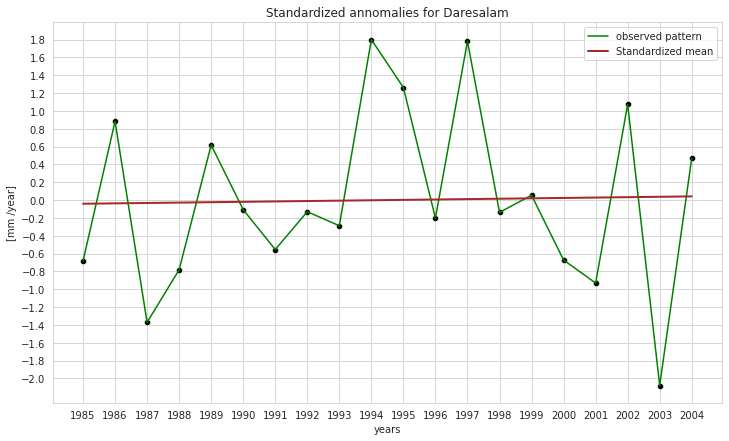

In [12]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
ax1 = sns.lineplot(x=r1, y=r2, data=T2M,color="green",label="observed pattern")
ax1 = sns.scatterplot(x=r1, y=r2, data=T2M,color="k")
ax1.set_xticks(range(1985,2005,1))
ax1.set_yticks(np.arange(-2,2.,0.2))
ax1.set(xlabel="years",ylabel="[mm /year]")
y1=T2M["years"]
y2=T2M["precipAnnomalies"]
z4=np.polyfit(y1,y2,1) 
p =z4[0]*y1+z4[1]
sns.lineplot(x=y1,y=p,color="brown",label="Standardized mean",linewidth= 2);
plt.title("Standardized annomalies for Daresalam");

In [13]:
z4

array([ 4.34015024e-03, -8.65642964e+00])